# Binomial Pricing Model
#### by
<ul>
    <li>Vedank Goyal 2K18/MC/122</li>
    <li>Sarthak Singh 2K18/MC/103</li>
</ul>

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from datetime import datetime
%matplotlib inline

### Getting the data
<ul>
    <li>The DataReader function of the pandas_datareader library uses Yahoo finance to get the stock prices.</li>
    <li>The stock price is read for Amazon company</li>
</ul>

In [2]:
ticker = 'AMZN'
df = pd.DataFrame()
df = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
...,...,...,...,...,...,...
2020-11-11,3139.149902,3050.000000,3061.780029,3137.389893,4366900,3137.389893
2020-11-12,3175.879883,3086.050049,3159.949951,3110.280029,4362000,3110.280029
2020-11-13,3141.719971,3085.389893,3122.000000,3128.810059,3756200,3128.810059


### Data cleaning
<ul>
    <li>We will use and work on the 'Adj Close' value of the stocks as they are more refined</li>
    <li>We will collect the data till June 26th 2020 and predict for the year 2020 after it</li>
</ul>

In [18]:
data = df['Adj Close'].iloc[:-100]
data

Date
2009-12-31     134.520004
2010-01-04     133.899994
2010-01-05     134.690002
2010-01-06     132.250000
2010-01-07     130.000000
                 ...     
2020-06-22    2713.820068
2020-06-23    2764.409912
2020-06-24    2734.399902
2020-06-25    2754.580078
2020-06-26    2692.870117
Name: Adj Close, Length: 2640, dtype: float64

### Computing log_returns or log of percentage change in values from day to day

In [19]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

Date
2009-12-31         NaN
2010-01-04   -0.004620
2010-01-05    0.005883
2010-01-06   -0.018282
2010-01-07   -0.017160
Name: Adj Close, dtype: float64

### Time vs Stock Price

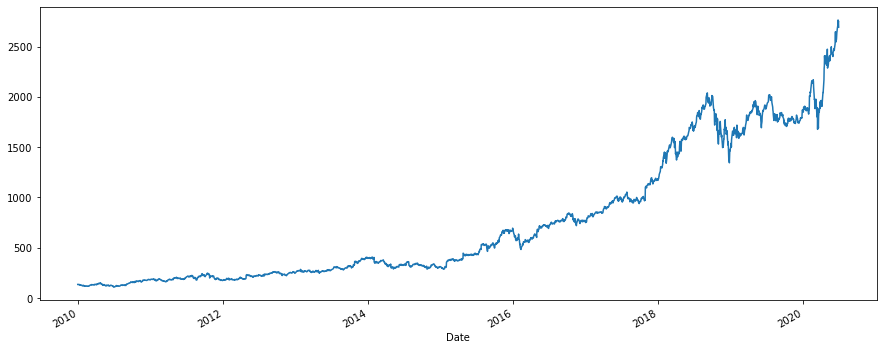

In [20]:
data.plot(figsize=(15,6))

### Computing parameters
<ul>
    <li>r is the risk free interest rate (taken as 0.001)</li>
    <li>var is the variance of returns</li>
    <li>sigma is the std deviation</li>
    <li>q is the dividend yeild ( For Amazon it is 0 )</li>
</ul>

In [21]:
r = 0.02672 #Average risk free rate of past 10 years 
var = log_returns.var()
sigma = log_returns.std()
q = 0

### Computing factors
<ul>
    <li>u is the factor by which Stock prices rises</li>
    <li>d is the factor by which Stock prices goes down</li>
    <li>p is the probability of stock price going up</li>
    <li>t is the time duration of each step measured in years</li>
</ul>

In [74]:
t = (df.shape[0] - data.shape[0])/365
u = np.exp(sigma*np.sqrt(t))
d = 1/u
p = (np.exp((r-q)*t)-d)/(u-d)
p

0.852587291943794

### Simulations and steps
<ul>
    <li>Taking 100 simulations</li>
    <li>n_steps is the number of days from June 26th 2020</li>
</ul>

In [76]:
n_simulations = 100
n_steps = 100
n_steps

100

### Generating the Tree

In [77]:
price_paths = np.zeros((n_steps, n_simulations))
for i  in range(n_simulations):
    price = data.iloc[-1]
    for j in range(n_steps):
        price_paths[j][i] = price
        probability = np.random.rand()
        if probability <= p :
            price = u*price
        else :
            price = d*price
price_paths

array([[2692.87011719, 2692.87011719, 2692.87011719, ..., 2692.87011719,
        2692.87011719, 2692.87011719],
       [2665.16067675, 2720.86765023, 2720.86765023, ..., 2665.16067675,
        2665.16067675, 2665.16067675],
       [2692.87011719, 2749.15627115, 2749.15627115, ..., 2692.87011719,
        2637.73636448, 2692.87011719],
       ...,
       [4756.37365977, 6354.07372649, 5166.68573884, ..., 4957.28635006,
        5849.46529218, 5497.48568938],
       [4805.8252571 , 6288.69076342, 5220.40331465, ..., 5008.82681891,
        5910.28166678, 5554.6425631 ],
       [4855.79099832, 6354.07372649, 5274.67938737, ..., 5060.90314946,
        5971.73034386, 5612.39369179]])

### Plotting the simulations
<ul>
    <li>X axis represents number of days from January 1st 2020</li>
    <li>Y axis represents the predicted stock values</li>
</ul>

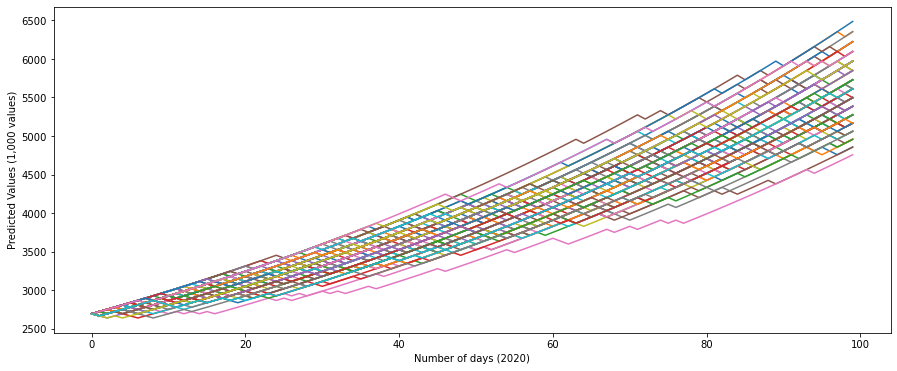

In [78]:
fig = plt.figure(figsize=(15,6))
plt.plot(price_paths)
plt.xlabel('Number of days (2020)')
plt.ylabel('Predicted Values (1,000 values)')
plt.show()

### Comparing with actual values
<ul>
    <li>Took mean of all 10,000 values</li>
    <li>Plotted the predicted mean values with actual values</li>
</ul>

(100, 2)


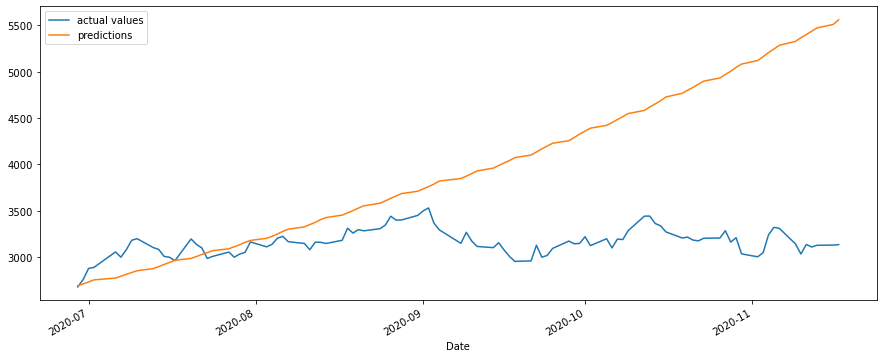

In [79]:
results = np.mean(price_paths,axis = 1)
stocks = pd.DataFrame()
stocks['actual values'] = df['Adj Close'].loc['2020-06-27':]
stocks['predictions'] = results
stocks.plot(figsize=(15,6))
print(stocks.shape)